In [133]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import cv2

## Understanding the dataset

In [109]:
# Load dataset

file_path = './umist_cropped.mat'
umist = loadmat(file_path)
umist.keys()

dict_keys(['__header__', '__version__', '__globals__', 'facedat', 'dirnames'])

In [115]:
# Understand the features and the structure of the data

X = umist['facedat']
print(f"Type: {type(X)}") 
print(f"Shape: {X.shape}")
print(f"Sample: {X[0][0][0]}")

Type: <class 'numpy.ndarray'>
Shape: (1, 20)
Sample: [[233 234 234 ... 236 230 234]
 [234 234 234 ... 235 234 232]
 [234 234 234 ... 236 233 234]
 ...
 [234 234 234 ... 237 232 233]
 [234 234 234 ... 236 233 234]
 [234 234 233 ... 236 234 233]]


In [127]:
print(f"Type of X[0]: {type(X[0])}")
print(f"Shape of X[0]: {len(X[0])}")

print(f"Type of X[0][0]: {type(X[0][0])}")
print(f"Shape of X[0][0]: {len(X[0][0])}")

image = X[0][0][0]
print(f"Type of X[0][0][0]: {type(image)}")
print(f"Shape of first image: {image.shape}")

Type of X[0]: <class 'numpy.ndarray'>
Shape of X[0]: 20
Type of X[0][0]: <class 'numpy.ndarray'>
Shape of X[0][0]: 112
Type of X[0][0][0]: <class 'numpy.ndarray'>
Shape of first image: (92, 38)


In [120]:
# Number of images per person

for i in range(len(X[0])):
    num_images_per_person = len(X[0][i])
    print(f"Person {i + 1} has {num_images_per_person} images.")

Person 1 has 112 images.
Person 2 has 112 images.
Person 3 has 112 images.
Person 4 has 112 images.
Person 5 has 112 images.
Person 6 has 112 images.
Person 7 has 112 images.
Person 8 has 112 images.
Person 9 has 112 images.
Person 10 has 112 images.
Person 11 has 112 images.
Person 12 has 112 images.
Person 13 has 112 images.
Person 14 has 112 images.
Person 15 has 112 images.
Person 16 has 112 images.
Person 17 has 112 images.
Person 18 has 112 images.
Person 19 has 112 images.
Person 20 has 112 images.


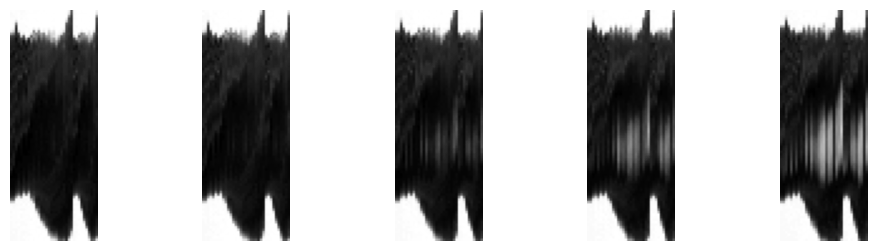

In [132]:
# Display the images for the first person

fig, axes = plt.subplots(1, 5, figsize=(12, 3)) 

for i in range(5):  
    image = np.array(X[0][1][i], dtype=np.uint8)  
    
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')  

plt.show()

Image 0 shape: (92, 38)
Image 1 shape: (92, 38)
Image 2 shape: (92, 38)
Image 3 shape: (92, 38)
Image 4 shape: (92, 38)


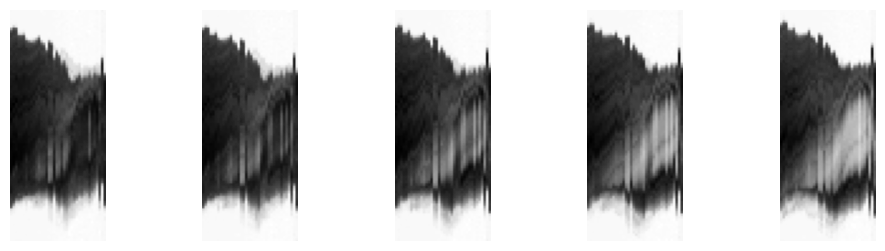

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i in range(5):
    image = np.array(X[0][0][i], dtype=np.uint8)
    print(f"Image {i} shape: {image.shape}")
    
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off') 

plt.show()

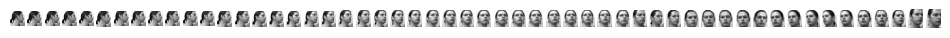

In [101]:
# Display the images for the first person

fig, axes = plt.subplots(1, 54, figsize=(12, 3))

for i in range(54):
    image = np.array(X[0][0][0][i], dtype=np.uint8)
    
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

plt.show()

Image 0 shape: (253, 252)
Image 1 shape: (242, 239)
Image 2 shape: (235, 211)
Image 3 shape: (238, 229)
Image 4 shape: (241, 257)


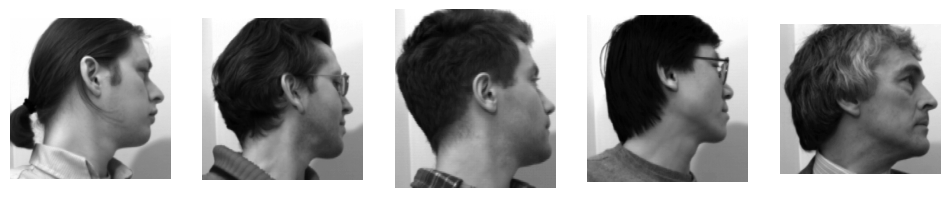

In [102]:

# Display the first 5 images

fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i in range(5):
    image = np.array(X[0][i][0][0], dtype=np.uint8)
    print(f"Image {i} shape: {image.shape}")
    
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

plt.show()


In [103]:
# Descriptive statistics

missing_count = 0
total_images = 0

for i in range(len(X[0])):
    for j in range(len(X[0][i][0])):
        image = X[0][i][0][j]
        total_images += 1
        if np.any(np.isnan(image)):
            missing_count += 1

print(f"Total images: {total_images}")
print(f"Images with missing data (NaN): {missing_count}")


Total images: 1012
Images with missing data (NaN): 0


In [104]:
for i in range(len(X[0])):
    for j in range(len(X[0][i][0])):
        image = X[0][i][0][j]
        min_val = min(min_val, np.min(image))
        max_val = max(max_val, np.max(image))

print(f"Image range: {min_val} a {max_val}")


Image range: 1 a 239


In [108]:
pixel_values = []

for i in range(len(X[0])):
    for j in range(len(X[0][i][0])):
        image = X[0][i][0][j]
        pixel_values.extend(image.flatten())

pixel_values = np.array(pixel_values)

mean_pixel = np.mean(pixel_values)
std_pixel = np.std(pixel_values)
min_pixel = np.min(pixel_values)
max_pixel = np.max(pixel_values)
percentile_25 = np.percentile(pixel_values, 25)
percentile_50 = np.percentile(pixel_values, 50) 
percentile_75 = np.percentile(pixel_values, 75)

print(f"Mean pixel value: {mean_pixel}")
print(f"Standard deviation of pixel values: {std_pixel}")
print(f"Minimum pixel value: {min_pixel}")
print(f"Maximum pixel value: {max_pixel}")
print(f"25th percentile of pixel values: {percentile_25}")
print(f"50th percentile (median) of pixel values: {percentile_50}")
print(f"75th percentile of pixel values: {percentile_75}")

Mean pixel value: 104.6687657360838
Standard deviation of pixel values: 58.238593864265034
Minimum pixel value: 1
Maximum pixel value: 239
25th percentile of pixel values: 55.0
50th percentile (median) of pixel values: 101.0
75th percentile of pixel values: 145.0
